```{image} https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png 
:width: 140px
:align: left
```
## Image Processing Laboratory Notebooks
---

This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming; they are running on the EPFL's Noto server. They are the practical complement of the theoretical lectures of the EPFL's Master course 
[**MICRO-511 Image Processing I**](https://moodle.epfl.ch/course/view.php?id=522) taught by Prof. M. Unser and Prof. D. Van de Ville.

The project is funded by the Center for Digital Education and the School of Engineering. It is owned by the [Biomedical Imaging Group](http://bigwww.epfl.ch/). 
The distribution or the reproduction of the notebook is strictly prohibited without the written consent of the authors.  &copy; EPFL 2023.

**Authors**: 
    [Pol del Aguila Pla](mailto:pol.delaguilapla@epfl.ch), 
    [Kay Lächler](mailto:kay.lachler@epfl.ch),
    [Alejandro Noguerón Arámburu](mailto:alejandro.nogueronaramburu@epfl.ch),
    [Yan Liu](mailto:yan.liu@epfl.ch), and
    [Daniel Sage](mailto:daniel.sage@epfl.ch).
    
---

# Lab 1.2: Fourier Transform
**Released**: Thursday October 5, 2023

**Submission**: Friday October 13, 2023 before 23:59 on [Moodle](https://moodle.epfl.ch/course/view.php?id=522)

**Grade weight**: Lab 1 (15 points), 10% of the overall grade

**Related lectures**: Chapters 1 and 2

Double-click on this cell, fill your name and SCIPER number below to verify your identity in Noto and set the seed for random results.
:::{attention} Please write down your name and SCIPER! 
### Student Name: 
### SCIPER: 
:::

In [1]:
import getpass
# This line recovers your camipro number to mark the images with your ID
uid = int(getpass.getuser().split('-')[2]) if len(getpass.getuser().split('-')) > 2 else ord(getpass.getuser()[0])
print(f'SCIPER: {uid}')

SCIPER: 262377


### Imports
In the next cell we import the python libraries and load the images that we will use throughout the lab similar to the previous notebook. Run the next cell to get your notebook ready.

:::{note}
While in the pixelwise operations lab we didn't need high accuracy, for transforms like the Fourier transform, as well as other transforms, it is essential to have the highest accuracy available.
:::

In [2]:
# Configure plotting as dynamic
%matplotlib widget

# Import required packages for this lab
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from skimage import io
 
from interactive_kit import imviewer as viewer

# Loading images
car = io.imread("images/car_pad.tif").astype(np.float64)
pens = io.imread("images/pens.tif").astype(np.float64)
zebra = io.imread("images/zebra.tif").astype('float64')

# Create the impulse image
impulse = np.zeros((65,65)); impulse[32,32] = 1;

# The Fourier transform (7 points)

In this second part we will look at the 2D discrete Fourier transform (*DFT*).

You are going to:
 * understand the effects of the elements in an image on its Fourier transform (*FT*), and then
 * understand how an image is reconstructed from its FT using the inverse Fourier transform (*iFT*). 

In this part of the lab we will only use Python. To compute the FT in Python, we will use the [`fft` module](https://numpy.org/doc/stable/reference/routines.fft.html) in NumPy, which implements the *FT* using a [fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm.

(ToC_2_Fourier_transform)=
## Table of contents
1. [Sinusoidal plane waves and their Fourier Transform](#sinusoidal-plane-waves) **(1 point)**
2. [Understanding the Fourier transform](#understanding-the-fourier-transform) **(3 points)**
    1. [Modulation](#modulation)
3. [Reconstruction of an image](#reconstruction-of-an-image) **(3 points)**
    1. [Reconstruction error](#reconstruction-error)
    2. [Fourier components](#fourier-components)

Run the next cell to display the images and get familiar with them.

In [3]:
# Define the list of images
image_list = [car, pens, zebra]
# Display all images used in this lab
initial_viewer = viewer(image_list, hist=True)

(sinusoidal-plane-waves)=
# 1. Sinusoidal plane waves and their Fourier Transform (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)

By now you have studied all the math in the lecture, but let's be honest, it is hard to believe that everything you see is really constructed from plane waves. So let's go back to basics, and make sure that we understand what is the Fourier Transform of a sinusoidal plane wave. To start off this section and **for 0.5 points**, answer the MCQ below.

* Q1: What is the mathematical expression for a 2D sinusoidal plane wave, given an amplitude $A$, period $T$, phase $\phi$ and angle $\alpha$?

1. $s(x, y) = A\cos(2\pi T[x\sin(\alpha) + y\cos(\alpha)] + \phi)$
2. $s(x, y) = A\cos(2\pi T[x\cos(\alpha) + y\sin(\alpha)] + \phi)$
3. $s(x, y) = A\cos(\frac{2\pi}{T}[x\cos(\alpha) + y\sin(\alpha)] + \phi)$
4. $s(x, y) = A\cos(\frac{2\pi}{T}[x\sin(\alpha) + y\cos(\alpha)] + \phi)$

:::{hint}
$\alpha$ is defined as the angle between the wave vector $(\omega_x, \omega_y)$ and the $x$-axis.
:::

In the next cell, assign your choice to the variable `answer`. 

In [4]:
# Modify the variable below to reflect your choice
answer = None
# YOUR CODE HERE

In [5]:
# Check that the answer is in the correct range
if not answer in [1, 2, 3, 4]: 
    print('WARNING:\nPossible values are 1, 2, 3 or 4.')

Possible values are 1, 2, 3 or 4.


In the cell below, **for 0.5 points**, implement the function `cos2D` that calculates $s(x,y)$ given the location (`x`, `y`) and the parameters `A`, `T` and `alpha` according to the equation you selected above.

:::{note}
We assume that $\phi=0$.
:::

In [6]:
# Function that computes the 2D sinusoidal plane wave at location (x, y) given the parameters A, T and alpha
def cos2D(x, y, A, T, alpha):
    s = 0
    
    # YOUR CODE HERE
    
    return s

Run the next cell for a sanity check.

In [7]:
if not np.allclose(cos2D(0, 0, 0.5, 32, 0), 0.5):
    print(f'WARNING: The value at (x=0, y=0) should be 0.5 when using A=0.5, T=32 and alpha=0. Your result is {cos2D(0, 0, 0.5, 32, 0):.3f}')
if not np.allclose(cos2D(8, 16, 1, 32, 0), 0):
    print(f'WARNING: The value at (x=8, y=0) should be 0 when using A=1, T=32 and alpha=0. Your result is {cos2D(8, 0, 1, 32, 0):.3f}')
if not np.allclose(cos2D(8, 16, 0.8, 32, np.pi/2), -0.8):
    print(f'WARNING: The value at (x=8, y=16) should be -0.8 when using A=0.5, T=32 and alpha=90°. Your result is {cos2D(8, 16, 0.8, 32, np.pi/2):.3f}')
if not np.allclose(cos2D(24, 24, 0.3, 32, np.pi/2), 0):
    print(f'WARNING: The value at (x=24, y=24) should be 0 when using A=0.3, T=32 and alpha=90°. Your result is {cos2D(24, 24, 0.3, 32, np.pi/2):.3f}')
if (np.allclose(cos2D(0, 0, 0.5, 32, 0), 0.5) and np.allclose(cos2D(8, 16, 1, 32, 0), 0) 
    and np.allclose(cos2D(8, 16, 0.8, 32, np.pi/2), -0.8) and np.allclose(cos2D(24, 24, 0.3, 32, np.pi/2), 0)):
    print('Nice, your function passed the sanity check. That does not guarantee that it is correct though.')

Now, before we do a visual test, we will declare the 2 functions `fourier` and `inverse_fourier`. which calculate the FT and the iFT respectively.
Make sure to understand how we use the `numpy.fft` module.

Run the next cell to declare this two functions.

In [8]:
# Function that returns the FT
def fourier(img):
    # Generate the FT
    ft = np.fft.fft2(img)
    # Shift the frequency range to [-pi/2, pi/2] 
    shift_ft = np.fft.fftshift(ft)
    return shift_ft

# Function that return the inverse FT
def inverse_fourier(ft):
    # Shift the FT back to [0, pi]
    ft = np.fft.ifftshift(ft)
    # Get the inverse FT
    ift = np.fft.ifft2(ft)
    # Clip the imaginary part of the reconstruction
    # (should be approximately zero anyway)
    ift = np.real(ift)
    return ift

Now it's time for the visual test. Run the next cell and see what is there. In the image on the left you should see $8$ periods of a $\cos$ in the horizontal direction, and the image should be constant in the vertical direction. If you see this, your function is most probably working fine. On the image on the right, you should see two horizontal dots (the FT of a sinusoidal plane wave). 

Now we want you to be convinced that sinusoidal waves can create patterns. Go to the menu `Extra Widgets`. Play with the parameters of the sine wave, and click on `Add 2D sin`. A new sinusoidal wave with the parameters that you have chosen will be added to the previous pattern. The Fourier Transform will update automatically. 

:::{attention} 
Spend a few minutes playing with the following widget! It will give you a great intuition of how superposition of plane waves can create real patterns. Play with the different parameteres to get different effects. Ask yourself, how can you create periodic patterns? How can you create a non-periodic pattern? Of course you will not get a Monet from the following widget (if you try hard enough, you might get one in black and white though), but we hope you will understand how everything is formed of sinusoidal plane waves.
:::

:::{note} 
If you want to start from the beginning again, you have to re-run the cell.
:::

In [9]:
# Creates a 2D sinusoidal plane wave of a given size and with given parameters
def create_wave(A, T, alpha, shape=(256, 256), deg=False):
    # Convert degrees to radians
    alpha = alpha/180 * np.pi if deg else alpha
    # Apply sin2D to the whole image
    return np.fromfunction(lambda y, x: cos2D(x, y, A=A, T=T, alpha=alpha), shape=shape)

# Define sliders and button
A_slider = widgets.FloatSlider(value=1, min=0, max=1, step=0.01, description='A')
T_slider = widgets.IntSlider(value=32, min=3, max=256, step=1, description='T')
alpha_slider = widgets.IntSlider(value=0, min=-90, max=90, step=1, description=r'$\alpha [deg]$')
button = widgets.Button(description='Add 2D sin')

# Callback function that adds a plane wave to the original img
def sin2D_callback(img):
    img = img + create_wave(A_slider.value, T_slider.value, alpha_slider.value, deg=True)
    # Ignore these lines
    view.original[0] = img
    view.original[1] = img
    return img

# Callback function that gets the absolute value of the FT, and takes its log for better visualization
def ft_callback(img):
    return 10*np.log10(np.abs(fourier(img))+1e-5)

# Declare initial plane wave
plane_wave = create_wave(A=1, T=32, alpha=0, deg=True)

plt.close('all')
view = viewer([plane_wave, plane_wave], title=['Sum of patterns', 'Fourier Transform'],
              new_widgets=[A_slider, T_slider, alpha_slider, button], 
              callbacks=[sin2D_callback, ft_callback], widgets=True, subplots=(1, 2))
button.click()

TypeError: Make sure that all your images are numpy arrays. Use the method np.array(object).

(understanding-the-fourier-transform)=
# 2. Understanding the Fourier transform (3 points)
[Back to table of contents](#ToC_2_Fourier_transform)

Now that we have learned how images are formed and the equivalence of the spatial and the Fourier components, it's time to dig deeper into the FT. As you know, calculating the FT of an image generates a two-dimensional array (image) of complex values, which makes it challenging to find a good visualization. Therefore, we usually extract the **magnitude** and **phase** of the complex numbers, which are much easier to deal with and present useful information. Remember that the magnitude of a complex number $z\in\mathbb{C}$ is given by
$$|z| = \sqrt{\operatorname{Re}(z)^2+\operatorname{Im}(z)^2}.$$

Furthermore, we usually visualize this magnitude in dB, i.e., 

$$|z|~[\mathrm{dB}] = 10\log_{10}\left(|z|^2\right).$$

One of the reasons for this is that the variations in the magnitude of the Fourier transform generally span very different ranges, from the very small to the very large, and the $\log(\cdot)$ transformation allows us to visualize both in the same image.

To do this, you will first define the function `magnitude(ft)`, which should return **the magnitude in decibels (`dB`)** of a FT given as an input parameter. For **0.5 points**, complete the function `magnitude(ft)` in the cell below according to the equation given above.

:::{hint}
Check the Numpy built-in functions for complex numbers, pay attention to the base of the log function you use.
:::

:::{warning} 
Using `np.absolute` in this exercise will give you **0 points**! We want you to implement the function yourself.
:::

In [10]:
# Function that returns the magnitude of the FT in dB
def magnitude(ft):
    # Initialize the output to 0
    output = None
    
    # YOUR CODE HERE
    
    # Return the output
    return output

In [11]:
# Let's do a sanity check
# The complex number used for the test which has a magnitude of ~3 dB
z = 1 + 1j
# Check that the magnitude function is correct
if np.round(magnitude(z), decimals=1) == 3.0:
    print("Nice, your magnitude function passed the basic sanity check!")
else:
    print("Something isn't quite right yet.")

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

Now, we will define a function to calculate the phase of the *FT*. For this we define the function `phase(ft)`, which takes as argument an *FT* and returns its phase.

Remember that the phase of a complex number $z$ is given by
$$\angle(z)=\arctan\left(\frac{\operatorname{Im}(z)}{\operatorname{Re}(z)}\right)\,.$$

For **0.5 points**, complete the function `phase(ft)` in the cell below according to the equation given above.

:::{hint}
Compare [`np.arctan2`](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) and [`np.arctan`](https://numpy.org/doc/stable/reference/generated/numpy.arctan.html#numpy.arctan), which one is more convenient to calculate $\angle(z)$? 
:::

:::{warning}
Using `np.angle` in this exercise will give you **0 points**! Implement the function yourself.
:::

In [12]:
# Function that calculates the phase of complex numbers
def phase(ft):
    # Initialize output variable
    output = None
    
    # YOUR CODE HERE
    
    return output

In [13]:
# Let's do a sanity check
# The complex number used for the test which has a phase of pi/4
z = 1 + 1j
# Check that the magnitude function is correct
if phase(z) == np.pi/4:
    print("Nice, your phase function passed the sanity check!")
else:
    print("Something isn't quite right yet.")

Something isn't quite right yet.


Now, let's look at the results of the functions you just coded. For this we will apply the *FT* to the image `car`, calculate its magnitude and phase, and visualize the results. 

Run the next cell to see the magnitude and phase of the *FT* of `car`.

:::{tip}
If you don't see the phase of the image (or only part of it), use `Ctrl + b` to hide the left sidebar of JupyterLab or lower the zoom of your browser. 
:::

If everything went well you should see:
* For the magnitude: a diagonal cross in the center with stars spread over the image, and
* For the phase: seemingly random noise, cut by a near vertical line and a few other straight lines.

In [14]:
# Generate the FT of car
car_ft = fourier(car)
# Calculate the magnitude
car_ft_mag = magnitude(car_ft)
# Calculate the phase
car_ft_ph = phase(car_ft)
# Visualize the two together with the original image
plt.close('all')
ft_vis = viewer([car, car_ft_mag, car_ft_ph], title=['Car', 'Car FT magnitude', 'Car FT phase'], subplots=(1,3))

TypeError: Make sure that all your images are numpy arrays. Use the method np.array(object).

### Multiple Choice Question

The following MCQs will test your understanding of the relationship of an image with its FT **magnitude**. Each is worth **0.5 points**.

* Q1: Where do the little stars at different distances from the center in the FT of `car` come from?
    1. From the contour of the car.
    2. From the driver.
    3. From the carpet under the car.
    4. From the details of the car (JAGUAR text, doors, steering wheel, etc).
    5. From the size of the image.
    
    
* Q2: Where do the two big intersecting lines in the FT of `car` come from? 
    1. From the contour of the car.
    2. From the driver.
    3. From the carpet under the car.
    4. From the details of the car (JAGUAR text, doors, steering wheel, etc).
    5. From the size of the image.

In the next cell, modify the variables `answer_one` and `answer_two` to reflect your choices. Then run the cells after that one for a quick sanity check.

In [15]:
# Assign your answer to this variable
answer_one = None
answer_two = None
# YOUR CODE HERE

In [16]:
if not answer_one in [1, 2, 3, 4, 5]: 
    print('WARNING!\nPossible answers are 1, 2, 3, 4 and 5.')

WARNING!
Possible answers are 1, 2, 3, 4 and 5.


In [17]:
if not answer_two in [1, 2, 3, 4, 5]: 
    print('WARNING!\nPossible answers are 1, 2, 3, 4 and 5.')

WARNING!
Possible answers are 1, 2, 3, 4 and 5.


(modulation)=
## 2.A. Modulation (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)


In this section we will explore the modulation property of the FT, a property that has wide applications in digital communications. Modulation is mathematically expressed as:

$$e^{j\langle\textbf{w}_0,\textbf{x}\rangle}f(\textbf{x})\stackrel{\mathcal{F}}{\longleftrightarrow}\hat{f}(\textbf{w}-\textbf{w}_0).$$

Basically, performing an element-wise multiplication of an image with a plane wave of frequency $\textbf{w}_0=\frac{2\pi}{T}[\cos(\alpha), \sin(\alpha)]$, will shift the frequencies of the image by $\textbf{w}_0$. This is very useful in digital communications, as the image can be encoded and transmitted using $\textbf{w}_0$, and then decoded back into the original. 

We already implemented the wave creation. In the next cell, **for 1 point**, you only need to implement the multiplication and Fourier tranformation to finish this function. 

The input parameters:

 * `img` : input image,
 * `T` : the period of the plane wave,
 * `alpha` : the angle of the plane wave.

The function outputs `mod_img` and `mag_ft`, which correspond to the modulated image in the spatial domain and the **magnitude** of its *FT* in dB, respectively. 

In [18]:
def modulate(img, T, alpha):
    # Declare outputs 
    mod_img = np.zeros(img.shape)
    mag_ft = np.zeros(img.shape)
    
    # Generate plane wave
    plane_wave = create_wave(img.max(), T, alpha, deg=True)
    
    # YOUR CODE HERE
    
    return mod_img, mag_ft 

Now run the next cell for a sanity check on your function. Do you realize why the two values we are testing should be $\pm 255\times255$?

In [19]:
mod_img, mag_ft = modulate(car, 64, 90)
if mod_img[32, 168] != -255*255:
    print('WARNING!\nThe value in the pixel [32, 168] is not correct!')
elif mod_img[64, 147] != 255*255:
    print('WARNING!\nThe value in the pixel [64, 147] is not correct!')
else:
    print('Good job! Your function passed this initial sanity check.')

WARNING!
The value in the pixel [32, 168] is not correct!


Great, if you passed the previous sanity check, your function is probably correct. Now it's time for the visual test. In the next cell we have declared 2 sliders, one for the period `T` and one for the angle `alpha` that will define the modulation plane wave. 

Run the next cell, and make sure that the experimental results match the equation presented in section [2.A. Modulation](#2.A.-Modulation-(1-point)). Go to the menu `Extra Widgets` to play with $T$ and $\alpha$.

In [20]:
# Declare necessary widgets
T_slider = widgets.IntSlider(value=64, min=0, max=128, step=2, description='T')
alpha_slider = widgets.IntSlider(value=90, min=-90, max=90, step=5, description='\u03b1')
button = widgets.Button(description='Modulate')

# declare the button callback
def modulation_callback(img):
    T = T_slider.value
    alpha = alpha_slider.value
    mod_img, _ = modulate(img, T, alpha)
    return mod_img

def ft_callback(img):
    T = T_slider.value
    alpha = alpha_slider.value
    _, mag_ft = modulate(img, T, alpha)
    return mag_ft

# Visualize
plt.close('all')
mod_viewer = viewer([car, car], title=['Modulated car', 'Modulated car FT'], new_widgets=[T_slider, alpha_slider, button], 
                    callbacks=[modulation_callback, ft_callback], widgets=True, subplots=(1,2))
button.click()

(reconstruction-of-an-image)=
# 3. Reconstruction of an image (3 points)
[Back to table of contents](#ToC_2_Fourier_transform)

As you learned in the course, it is possible to reconstruct an image from its Fourier transform by performing the inverse Fourier transform. In the next exercise we will investigate the role that the magnitude and phase of the *FT* has on the reconstruction of an image. For this we first need to create a function that reconstructs an image from its *FT* magnitude (in $\mathrm{dB}$) and phase. Run the next cell to define the function `reconstruct` and make sure that you understand every line of the code.

In [21]:
# Function that reconstructs an image from its FT magnitude (in dB) and phase
def reconstruct(mag, ph):
    # Since the magnitude is in dB we first need to convert it back
    mag = 10 ** (mag / 20)
    # Now we can restore the complex FT from the magnitude and phase using the polar representation
    ft = mag * np.exp(1j * ph)
    # Having the complex FT we can simply use the inverse_fourier function that we defined above to reconstruct the image
    return inverse_fourier(ft)

Let's see if the function works. Run the cell below to reconstruct the car image from its magnitude and phase, and visualize the result. 

:::{important}
If the reconstruction is not near perfect, check again your functions `magnitude` and `phase`. You will need both functions to answer the next questions. 
:::

In [22]:
# Reconstruct the car image
car_reconstructed = reconstruct(car_ft_mag, car_ft_ph)
# Display the result
plt.close('all')
ft_rec_vis = viewer([car, car_reconstructed], title=['Original car', 'Reconstructed car'], subplots=(1,2))
np.testing.assert_array_almost_equal(car, car_reconstructed, err_msg='Check again your magnitude and phase functions!')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

Since we didn't make any changes to the *FT* before the reconstruction, the reconstructed image should be (almost) identical to the original image (if it's not, you should have seen an error message). 

For the next excercise we will use the `pens` image in addition to the car image. Run the next cell to visualize it again. Moreover, we will plot its *FT*'s magnitude and phase (browse through the images with the buttons `Next` & `Prev`). This will help you to answer the upcoming questions.

In [23]:
# Generate FT of the pens image
pens_ft = fourier(pens)
# Extract the magnitude and phase
pens_ft_mag = magnitude(pens_ft)
pens_ft_ph = phase(pens_ft)

# Visualize
plt.close('all')
pens_vis = viewer([pens, pens_ft_mag, pens_ft_ph], widgets=True)

TypeError: Make sure that all your images are numpy arrays. Use the method np.array(object).

Now lets see what happens if we use the magnitude of one image and the phase of another image to do the reconstruction. What do you think will happen? Run the cell below and observe the results. Try to make a conclusion on what type of information is stored in the phase of the *FT*.

In [24]:
# Reconstruct an image with the magnitude of car and phase of pens
car_pens = reconstruct(car_ft_mag, pens_ft_ph)
# Reconstruct an image with the magnitude of pens and phase of car
pens_car = reconstruct(pens_ft_mag, car_ft_ph)
# Visualize the results
plt.close('all')
rec_comp_vis = viewer([car_pens, pens_car], title=['Magn. = car, Phase = pens', 'Magn. = pens, Phase = car'], subplots=(1,2))

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

### Multiple choice question

For **0.5 points**, what type of information of the image is stored in the **phase** of the FT that is **not stored** in the magnitude? 


1. The spatial frequencies contained in the image.
2. The light intensity of each pixel.
3. The location of objects (i.e. sinusoids) in the image.

Modify the variable `answer`in the next cell to reflect your choice. The second cell is for you to check that you have entered a valid answer.

:::{hint}
If you have doubts, you can go back to the widget right before [section 2](#understanding-the-fourier-transform). Moreover, look carefully at the *periodic patterns* in the two images above.
:::

In [25]:
# Assign your answer to this variable
answer = None
# YOUR CODE HERE

In [26]:
# Sanity check
if not answer in [1, 2, 3]:
    print('WARNING!\nValid answers are 1, 2 or 3.')

WARNING!
Valid answers are 1, 2 or 3.


(reconstruction-error)=
## 3.A. Reconstruction error (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)

How many Fourier coefficients do we really need to keep to still have the basic information present in an image? Do all coefficients contribute the same? In order to quantify _how good_ a certain reconstruction is, we will use a metric to assess the quality of the reconstruction.

The metric we use is the normalized mean square error (NMSE) in dB. It calculates the difference between an image $f$ of size $K\times L$ and its reconstruction $g$ normalizes by the total power of $f$.

$$\operatorname{NMSE}_f(g) =  \frac{\sum_{k=1}^{K} \sum_{l=1}^L (g[k,l] - f[k,l])^2}{\sum_{m=1}^{K} \sum_{n=1}^L f[m,n]^2}\mbox{, and } \operatorname{NMSE}_f(g)~[\mathrm{dB}] = 10 \log_{10}\left(\operatorname{NMSE}_f(g)\right).$$

This makes it easier for one to observe, for example, when the error has doubled ($+3~\mathrm{dB}$) or halved ($-3~\mathrm{dB}$) in plots.

For **1 point**, complete the function `nmse(f, g)` in the cell below according to the equation given above, where `f` and `g` are two NumPy arrays of the same shape.

:::{warning}
Remember that your function should **not use `for` loops** to iterate through images (this will give you $0$ points), and should work for NumPy arrays of any shape.
:::

In [27]:
# Function that calculates the Normalized Mean Square Error in dB
def nmse(f, g):
    # Declare the output variable
    output = None
    
    # YOUR CODE HERE
    
    # Return MSE
    return output

In [28]:
# Sanity check (do not worry about the divide by zero note)
if  nmse(impulse, impulse) != -np.infty: 
    print('The error between two equal images should be zero. In dB -infinity.')
# Check your function on the hrct image
elif nmse(impulse, 0) != 0:
    print('The error of any image and a zero-image should be 1. In dB, 0.')
else:
    print('Nice, your function seems to work! Do not worry about the divide by zero warning!')

The error between two equal images should be zero. In dB -infinity.


(fourier-components)=
## 3.B. Fourier components (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)

In this section we look into the reconstruction process of an image from part of its Fourier components. This touches a topic that will continue to appear in IP1 and IP2: how much does a given transform compress an image? 

We define a function `clip_fourier(img, percent)` that reconstructs an image for only `percent`$\%$ of its Fourier coefficients. If `largest=True`, only the largest are kept, while 
if `largest=False`, they are excluded and only all the rest are kept. This will illustrate the uneven distribution of information contained in the Fourier components.

Run the next cell to define the function `clip_fourier`.

In [29]:
 def clip_fourier(img, percent, largest=True, perc=True):
    # Get number of coefficients to keep
    if perc:
        # Extract from percentage
        n = np.round(np.prod(img.shape) * percent / 100).astype(int)
    else: 
        # Pass directly
        n = percent
    # Get ft of img
    img_ft = np.fft.fft2(img)
    # Get the threshold value. To do this, we order the Fourier coefficients 
    # from low to high and select the n-to-last ([-n]) coefficient
    threshold = np.sort(np.abs(img_ft.flatten()))[-n]
    if largest == True:
        # Get the inverse Fourier transform of the thresholded Fourier transform
        clipped_ift = np.real(np.fft.ifft2((np.abs(img_ft) >= threshold) * img_ft))
    else:
        # Get the inverse Fourier transform of the thresholded Fourier transform
        clipped_ift = np.real(np.fft.ifft2((np.abs(img_ft) < threshold) * img_ft))
    return clipped_ift

Let's use the error metric `nmse` defined before to illustrate the difference in information contained in the few largest Fourier components compared to the information contained in the rest. In the cell below we will reconstruct the image `zebra` using: 
 * only the `percent` largest Fourier components, and 
 * using the `100-percent` smallest components. 

Then we will compare the reconstruction error by applying the `nmse` function defined above with both reconstructions. Run the cell below to see the different reconstruction errors. Play with the variable `percent` and see what happens.

In [30]:
import warnings
# Suppress traitlets deprecation warning - do not modify
warnings.simplefilter("ignore")

percent = 20
# First, reconstruct zebra using the largest components
zebra_largest = clip_fourier(zebra, percent)
# Reconstruct zebra using the smallest components
zebra_smallest = clip_fourier(zebra, percent, largest=False)
# Calculate the errors
error_l = nmse(zebra, zebra_largest )
error_s = nmse(zebra, zebra_smallest)
# Compare the error
print(f'The reconstruction error when using the {percent}% largest  components: NMSE = {error_l:.4f}')
print(f"The reconstruction error when using the {100 - percent}% smallest components: NMSE = {error_s:6.4f}")
# Visualize images
view = viewer([zebra, zebra_largest, zebra_smallest], 
              title=['Original', f'{percent}% Largest Components', f'{100-percent}% Smallest Components'], 
              widgets=True)

TypeError: unsupported format string passed to NoneType.__format__

In the long run, this type of characteristics of transforms are explored using graphs like the one below, where the NMSE can be seen as a function of the percentage of the largest coefficients kept.

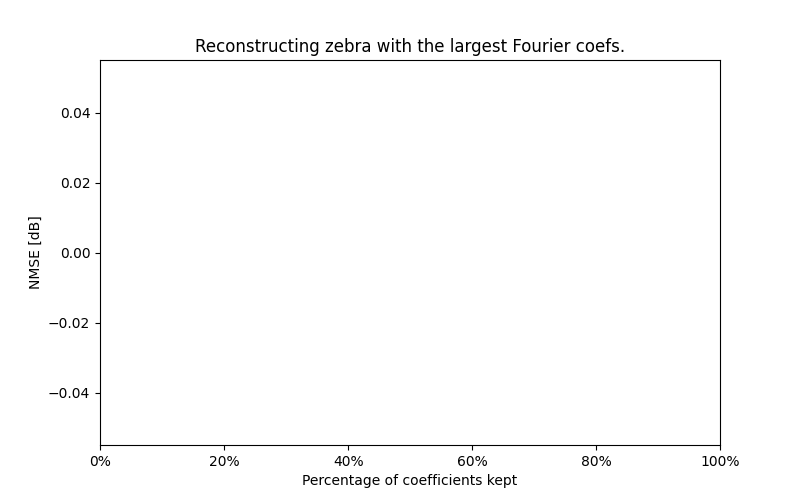

In [31]:
plt.close("all")
# Create figure
fig = plt.figure(num=f"SCIPER: {uid}",figsize=(8,5));
# Plot the NMSE vs kept coefficients curve
plt.plot(np.arange(.5, 100, 5), [nmse(zebra, clip_fourier(zebra, perc)) for perc in np.arange(.5, 100, 5)], 'bo-');
# Labels and titles for clear plotting
plt.xlabel("Percentage of coefficients kept"); plt.ylabel("NMSE [dB]"); 
plt.xticks([0, 20, 40, 60, 80, 100], [f"{perc}%" for perc in [0, 20, 40, 60, 80, 100]]);
plt.title("Reconstructing zebra with the largest Fourier coefs.")
plt.show()

Now we are going to create a widget to apply the function to an image and dynamically visualize its effect. 

We will define a slider to choose an integer `n` such that **the number of largest coefficients kept is $2^n$**. 

:::{note}
The visual difference between the reconstructions is only apparent for percentages between $0\%$ and $2\%$, and very small steps would be needed. Keep in mind that you are not working with percentages anymore.
:::

We will also provide a checkbox to switch between the two modes of operation (keeping the largest, or keeping all the rest). Click the button `Apply` to apply `clip_fourier()` with the chosen parameter on the image. Run the next cell and click on `Extra Widgets` to use the widget. Explore the results carefuly.

In [ ]:
# Declare slider and checkbox
n_slider = widgets.IntSlider(value=16, min=0, max=16, step=1, description='n')
checkbox = widgets.Checkbox(value=True, description='Use largest components')

# Declare btutton
button = widgets.Button(description='Apply')

# declare the button callback
def button_callback(image):
    n      = n_slider.value
    check  = checkbox.value
    output = clip_fourier(image, 2**n, largest=check, perc=False)
    return output

# declare the button callback
def button_callback_fourier(image):
    n      = n_slider.value
    check  = checkbox.value
    output = clip_fourier(image, 2**n, largest=check, perc=False)
    output = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft2(output)))+1e-3)
    return output

# visualize
plt.close('all')
cfourier_viewer = viewer([zebra, zebra], title=["Clipping the FT", 'FT of the clipped image'], new_widgets=[n_slider, checkbox, button], callbacks = [button_callback, button_callback_fourier], widgets=True, normalize=True, subplots=(1,2))
button.click()

### Multiple Choice Question
Congratulations! You made it to the end of the notebook. Now you just need to answer these last two MCQ questions (**0.5 points** each).

* Q1: How many largest Fourier coefficients are required to start **clearly** noting a zebra in the image?
    1. $2^{1}$
    2. $2^{4}$
    3. $2^{11}$
    4. $2^{16}$

Modify the variable `answer` to reflect your choice. The second cell will raise an error if you have not answered.

In [ ]:
# assign your answer to this variable
answer = None
# YOUR CODE HERE

In [ ]:
if not answer in [1, 2, 3, 4]: 
    print('WARNING!\nPossible answers are 1, 2, 3 and 4.')

* Q2: How is it possible to reconstruct a non-periodic object such as the zebra (there is only one zebra in the image) in an image from only periodic components?
    1. The black and white stripes in the zebra make it possible.
    2. The FT assumes that the image is periodic in space.
    3. The biggest components of the FT are non-periodic, to account for such features in an image.

Modify the variable `answer` to reflect your choice. The second cell will raise an error if you have not answered.

In [ ]:
# Assign your answer to this variable
answer = None
# YOUR CODE HERE

In [ ]:
if not answer in [1, 2, 3]: 
    print('WARNING!\nPossible answers are 1, 2 and 3.')

Congratulations on finishing the second part of the Pixel-Fourier lab!

:::{attention}
Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload it to [Moodle](https://moodle.epfl.ch/mod/assign/view.php?id=1157357), in a zip file with the other notebook of this lab.

* Keep the name of the notebook as: *2_Fourier_Transform.ipynb*,
* Name the zip file: *Pixel_Fourier_lab.zip*.
:::